In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_intractivity = "all"
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [4]:
image = cv2.imread('qr.png')

In [5]:
print("The type of this input is {}".format(type(image)))

The type of this input is <class 'numpy.ndarray'>


In [6]:
print("Shape: {}".format(image.shape))

Shape: (400, 400, 3)


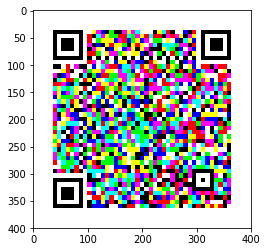

In [7]:
plt.imshow(image)

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

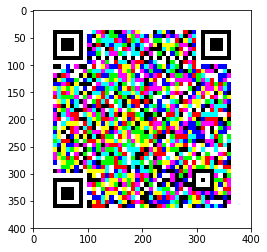

In [9]:
plt.imshow(image)

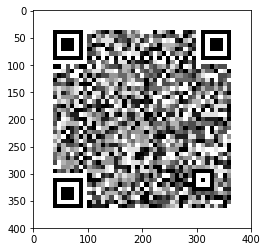

In [10]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [11]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [12]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [13]:
def get_colors(image, number_of_colors, show_chart):
    
    #modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    #modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([-1.02318154e-11,  2.55000000e+02,  2.55000000e+02]),
 array([255., 255., 255.]),
 array([-1.06865627e-11,  4.38546977e-11,  5.15285592e-11]),
 array([2.55000000e+02, 3.72040176e-11, 2.55000000e+02]),
 array([2.55000000e+02, 2.55000000e+02, 2.63469246e-11]),
 array([-1.01465503e-11,  2.55000000e+02,  2.31921149e-11]),
 array([2.55000000e+02, 3.52997631e-11, 2.38458142e-11]),
 array([-1.01465503e-11,  3.48734375e-11,  2.55000000e+02])]

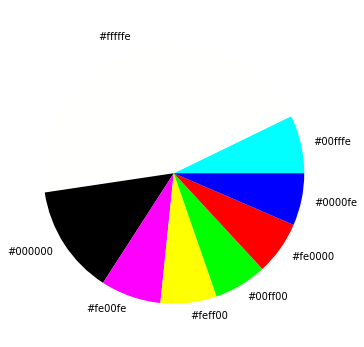

In [14]:
get_colors(get_image('qr.png'), 8, True)